In [1]:
import sys
sys.path.insert(0, '../scripts')
from load_data_df import *

# Plotting Modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Paths

In [2]:
# AES
aes_data_dir   = '/Users/ti27457/Repos/ttb/circuits/aes'
# aes_data_dir = '/Volumes/TI27457/ttb/circuits/aes-logs-50tests-100res-100ps'
# aes_data_dir = '/Volumes/TI27457/ttb/circuits/aes-logs-100tests-100res-100ps'

# UART
uart_data_dir = '/Users/ti27457/Repos/ttb/circuits/uart'
# uart_data_dir = '/Volumes/TI27457/ttb/circuits/uart-logs-1tests-10000res-100ps'

# OR1200

# Load Data

In [3]:
# AES
aes_counter_df    = load_data_df(aes_data_dir)
aes_counter_sizes = load_counter_sizes(aes_data_dir)

# UART
uart_counter_df    = load_data_df(uart_data_dir)
uart_counter_sizes = load_counter_sizes(uart_data_dir)

# OR1200

# Plot Settings

In [4]:
# Plot Settings
FIG_WIDTH            = 12
FIG_HEIGHT           = 6
HIST_SAVE_AS_PDF     = True
AES_FP_SAVE_AS_PDF   = True
UART_FP_SAVE_AS_PDF  = True
HIST_PDF_FILENAME    = 'cntr_sizes_histogram.pdf'
AES_FP_PDF_FILENAME  = 'aes-100tests-100res-100ps-2x.pdf'
UART_FP_PDF_FILENAME = 'uart_false_positives.pdf'

# Plot Counter Size Histogram

Histogram: [  0 344   0  40   0  22]
Bins:      [  0   8  16  32  64 128 256]
Histogram: [92 40  2  2  0  0]
Bins:      [  0   8  16  32  64 128 256]


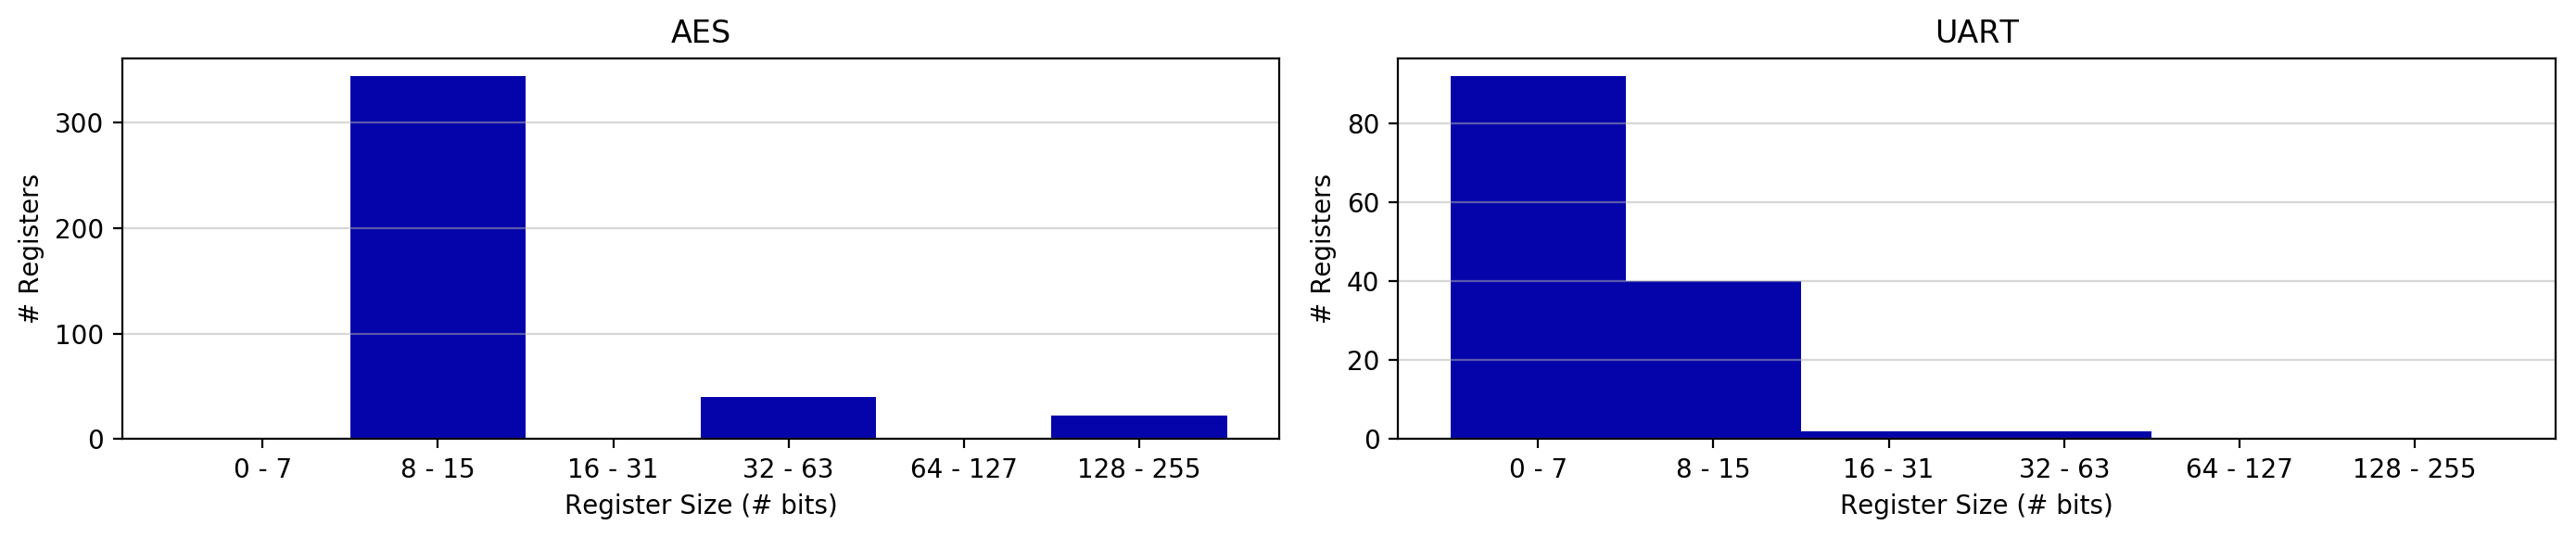

In [5]:
def plt_histogram(data, ax, title):
    bins = [0,8,16,32,64,128,256] # your bins

    # Create Histogram
    hist, bin_edges = np.histogram(data,bins) # make the histogram
    print "Histogram:", hist
    print "Bins:     ", bin_edges

    # Plot Histogram
    ax.bar(\
        range(len(hist)),\
        hist,\
        width      = 1,\
        align      = 'center',\
        tick_label = ['{} - {}'.format(bins[i], bins[i+1]-1) for i,j in enumerate(hist)],
        color      = '#0504aa')

    # Format Histogram
    ax.set_title(title)
    ax.set_xlabel('Register Size (# bits)')
    ax.set_ylabel('# Registers')
    ax.grid(axis='y', alpha=0.5)

# Create Figure
fig, axes = plt.subplots(1, 2, figsize=(14, 3), dpi=200)

# AES Histogram
plt_histogram(aes_counter_sizes['Coalesced Sizes'], axes[0], 'AES')

# UART Histogram
plt_histogram(uart_counter_sizes['Coalesced Sizes'], axes[1], 'UART')

# Save Histogram to PDF
plt.tight_layout(h_pad=1)
if HIST_SAVE_AS_PDF:
    plt.savefig(HIST_PDF_FILENAME, format='pdf')
plt.show()

# Plot AES False Positives

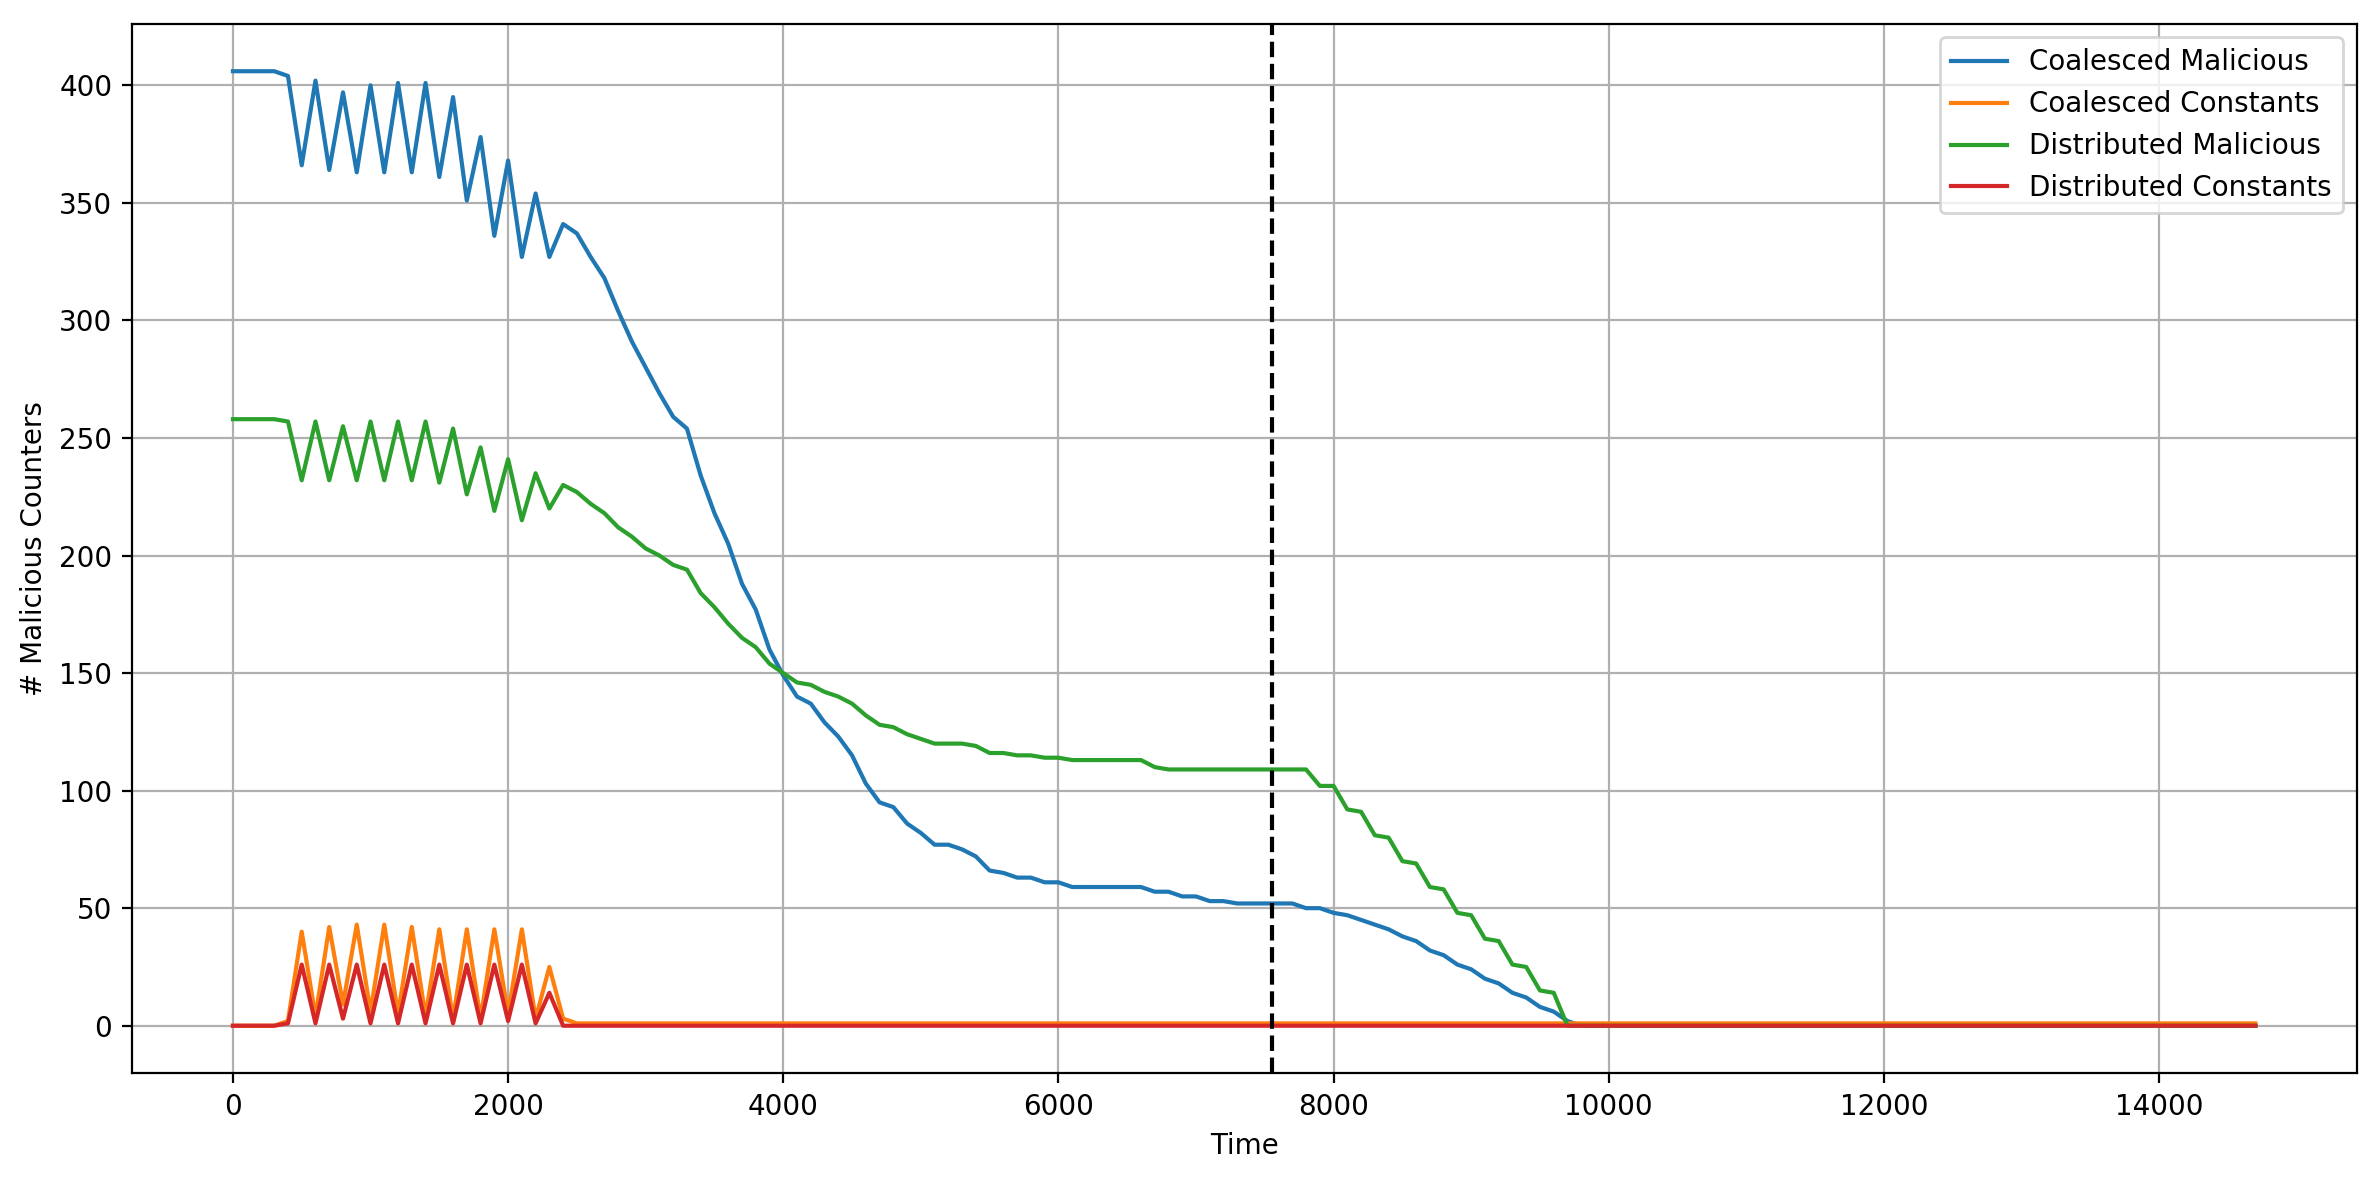

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=200)

sns.lineplot(x="Time", y="Coalesced Malicious", data=aes_counter_df, ax=ax)
sns.lineplot(x="Time", y="Coalesced Constants", data=aes_counter_df, ax=ax)
sns.lineplot(x="Time", y="Distributed Malicious", data=aes_counter_df, ax=ax)
sns.lineplot(x="Time", y="Distributed Constants", data=aes_counter_df, ax=ax)
ax.set_ylabel('# Malicious Counters')
ax.set_xlabel('Time')
ax.grid()
plt.legend(labels=["Coalesced Malicious", "Coalesced Constants", "Distributed Malicious", "Distributed Constants"])
plt.tight_layout(h_pad=1)

# Scale the plot
# ax.set_xlim(0, 50000)
plt.axvline(x=7550, color='k', linestyle='--')

if AES_FP_SAVE_AS_PDF:
    plt.savefig(AES_FP_PDF_FILENAME, format='pdf')

# Plot UART False Positives

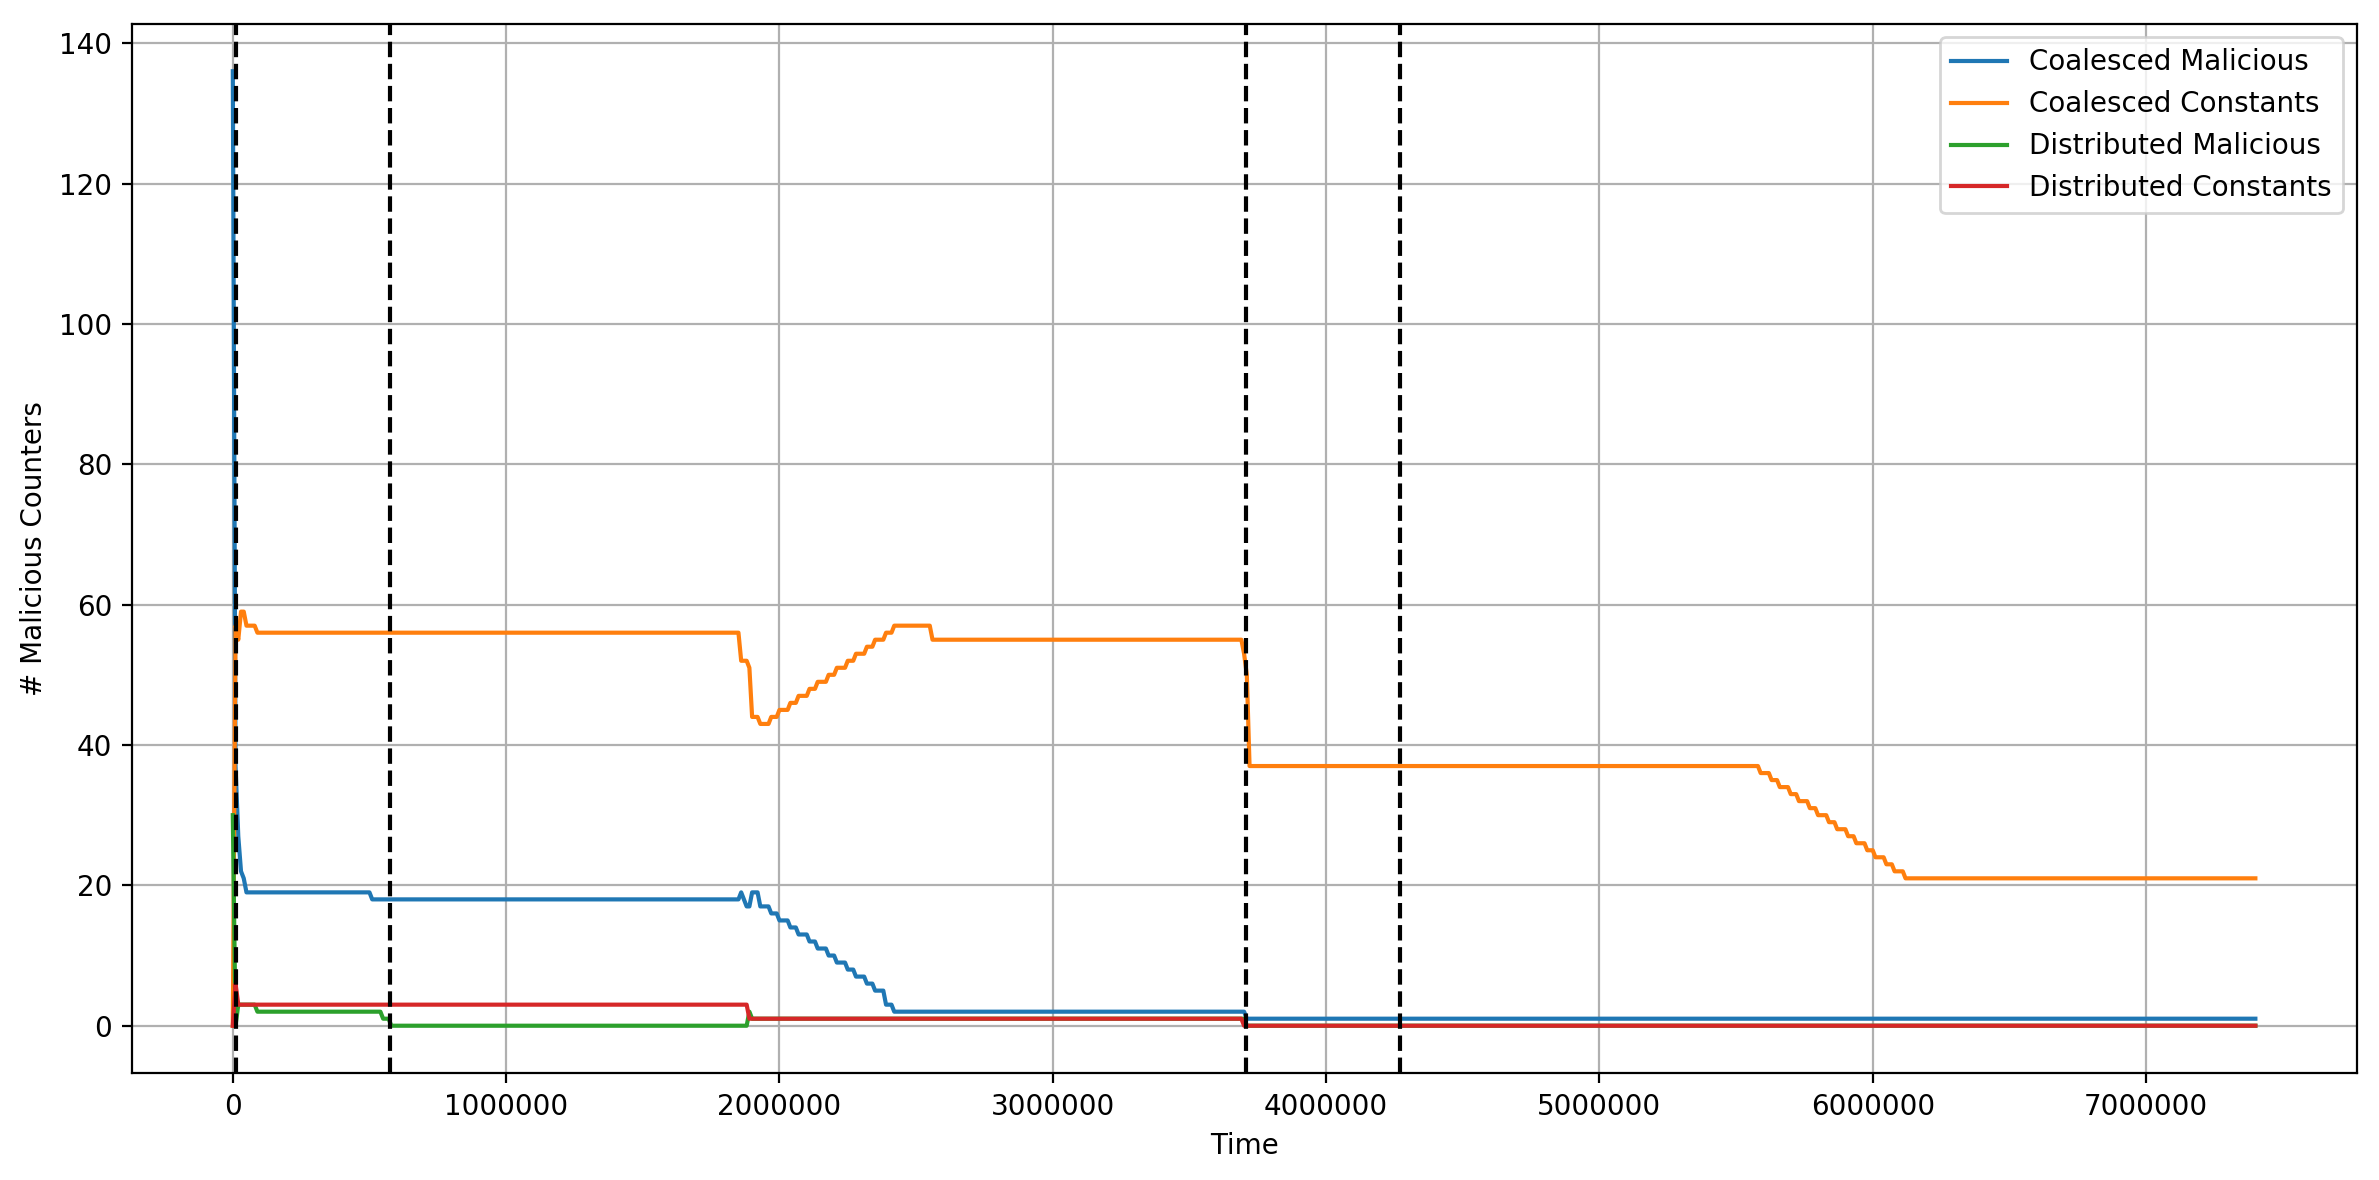

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=200)

df = uart_counter_df
sns.lineplot(x="Time", y="Coalesced Malicious", data=df, ax=ax)
sns.lineplot(x="Time", y="Coalesced Constants", data=df, ax=ax)
sns.lineplot(x="Time", y="Distributed Malicious", data=df, ax=ax)
sns.lineplot(x="Time", y="Distributed Constants", data=df, ax=ax)
ax.set_ylabel('# Malicious Counters')
ax.set_xlabel('Time')
ax.grid()
plt.legend(labels=["Coalesced Malicious", "Coalesced Constants", "Distributed Malicious", "Distributed Constants"])
plt.tight_layout(h_pad=1)

# Scale the plot
# ax.set_xlim(0, 100000)
plt.axvline(x=11550, color='k', linestyle='--')    # END register toggling
plt.axvline(x=575160, color='k', linestyle='--')   # END transmit-1 (16) bytes
plt.axvline(x=3707750, color='k', linestyle='--')  # END receive-1  (16) bytes
plt.axvline(x=4271360, color='k', linestyle='--')  # END transmit-2 (16) bytes
# plt.axvline(x=7403750, color='k', linestyle='--')  # END receive-2  (16) bytes
# plt.axvline(x=7967360, color='k', linestyle='--')  # END repeat transmit-1 (16) bytes
# plt.axvline(x=11099760, color='k', linestyle='--') # END repeat receive-1  (16) bytes
# plt.axvline(x=11663360, color='k', linestyle='--') # END repeat transmit-2 (16) bytes


if UART_FP_SAVE_AS_PDF:
    plt.savefig(UART_FP_PDF_FILENAME, format='pdf')